# Pie Charts,Box plots,Scatter Plots,Bubble plots for Immigrations to Canada

In [28]:
import numpy as np
import pandas as pd
!pip3 install openpyxl

In [68]:
df_can=pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                    sheet_name='Canada by Citizenship',
                    skiprows=20,
                    skipfooter=2)
df_can.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [71]:

print("befor cleaning",df_can.shape)
df_can.drop(['Type','Coverage','AREA','REG','DEV','DevName'],axis=1,inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.columns=list(map(str,df_can.columns))
df_can.set_index('Country',inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years=list(map(str,range(1980,2014)))
print(years)
print("after cleaning",df_can.shape)
df_can.head()

befor cleaning (195, 43)
['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
after cleaning (195, 37)


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


## Visualization

In [44]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib vaersion", mpl.__version__)

matplotlib vaersion 3.4.3


### Pie charts
Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


In [46]:
df_continent=df_can.groupby('Continent',axis=0).sum()
df_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


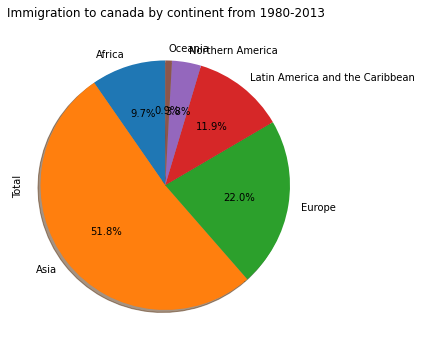

In [51]:
df_continent['Total'].plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Immigration to canada by continent from 1980-2013')
plt.axis('equal')
plt.show()

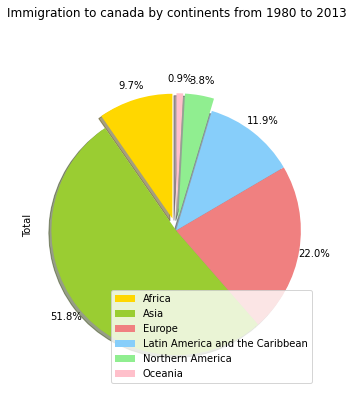

In [56]:
color_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list=[0.1,0,0,0,0.1,0.1]
df_continent['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%',
                            startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=color_list,
                           explode=explode_list)
plt.title('Immigration to canada by continents from 1980 to 2013',y=1.12)
plt.axis('equal')
plt.legend(labels=df_continent.index,loc='lower right')
plt.show()


Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

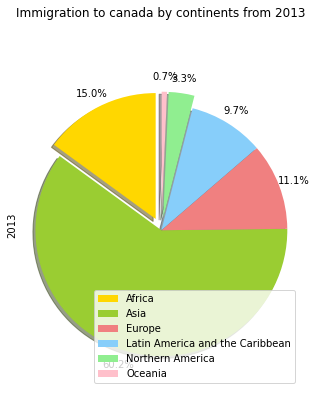

In [58]:
color_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list=[0.1,0,0,0,0.1,0.1]
df_continent['2013'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%',
                            startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=color_list,
                           explode=explode_list)
plt.title('Immigration to canada by continents from 2013',y=1.12)
plt.axis('equal')
plt.legend(labels=df_continent.index,loc='lower right')
plt.show()


### Box Plots
Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Country  Japan
1980       701
1981       756
1982       598
1983       309
1984       246


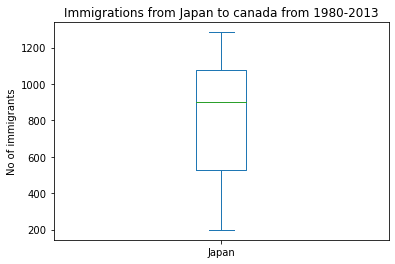

In [72]:
df_Japan=df_can.loc[['Japan'],years].transpose()
print(df_Japan.head())
df_Japan.plot(kind='box')
plt.title('Immigrations from Japan to canada from 1980-2013')
plt.ylabel('No of immigrants')
plt.show()

In [73]:
df_Japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

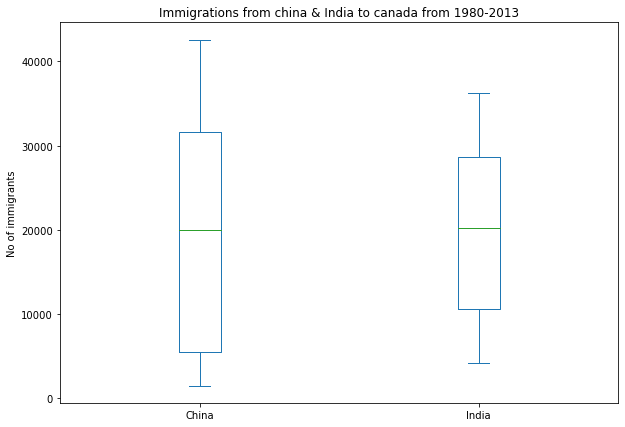

In [76]:
df_CI= df_can.loc[['China','India'],years].transpose()
df_CI.plot(kind='box',figsize=(10,7))
plt.title('Immigrations from china & India to canada from 1980-2013')
plt.ylabel('No of immigrants')
plt.show()

In [75]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


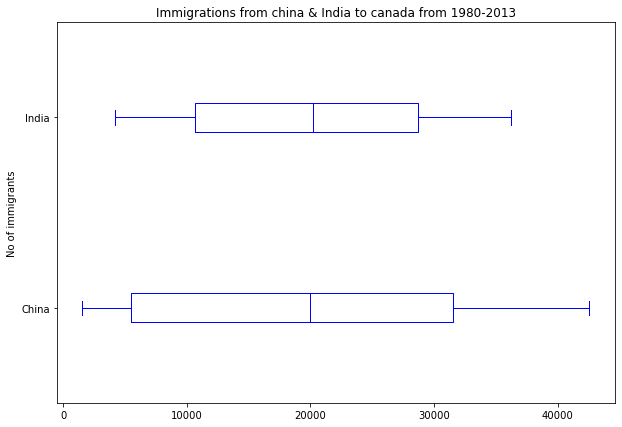

In [77]:
df_CI.plot(kind='box',figsize=(10,7),vert=False,color='blue')
plt.title('Immigrations from china & India to canada from 1980-2013')
plt.ylabel('No of immigrants')
plt.show()

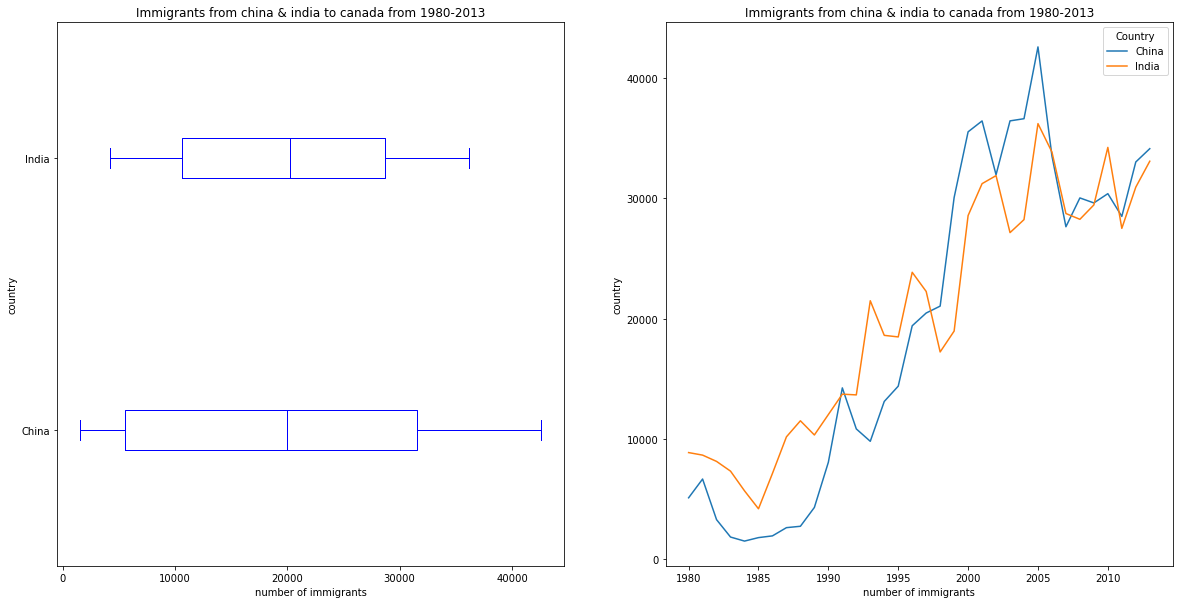

In [80]:
# Sub plots
fig=plt.figure()
ax0= fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

df_CI.plot(kind='box',figsize=(20,10),vert=False,color='blue',ax=ax0)
ax0.set_title('Immigrants from china & india to canada from 1980-2013')
ax0.set_xlabel('number of immigrants')
ax0.set_ylabel('country')
df_CI.plot(kind='line',figsize=(20,10),ax=ax1)
ax1.set_title('Immigrants from china & india to canada from 1980-2013')
ax1.set_xlabel('number of immigrants')
ax1.set_ylabel('country')
plt.show()

Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [81]:
df_top15 = df_can.sort_values(['Total'],ascending=False,axis=0).head(15)
df_top15.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [82]:
year_80=list(map(str,range(1980,1990)))
year_90=list(map(str,range(1990,2000)))
year_20=list(map(str,range(2000,2014)))

df_80=df_top15.loc[:,year_80].sum(axis=1)
df_90= df_top15.loc[:,year_90].sum(axis=1)
df_20= df_top15.loc[:,year_20].sum(axis=1)

new_df= pd.DataFrame({'1980s':df_80,'1990s':df_90,'2000s':df_20})
new_df.head()


,1980s,1990s,2000s
Country,,,
India,82154,180395,429355
China,32003,161528,466431
United Kingdom of Great Britain and Northern Ireland,179171,261966,110363
Philippines,60764,138482,312145
Pakistan,10591,65302,165707


In [83]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,138333.266667
std,44190.676455,68237.560246,145288.871956
min,7613.000000,30028.000000,16775.000000
25%,16698.000000,39259.000000,46754.500000
50%,30638.000000,56915.000000,88133.000000
75%,59183.000000,104451.500000,138035.000000
max,179171.000000,261966.000000,466431.000000


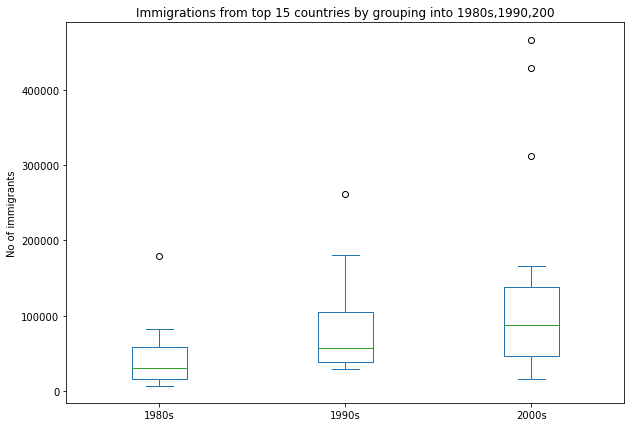

In [84]:
new_df.plot(kind='box',figsize=(10,7))
plt.title('Immigrations from top 15 countries by grouping into 1980s,1990,200')
plt.ylabel('No of immigrants')
plt.show()

In [85]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]


,Country,1980s,1990s,2000s
0,India,82154,180395,429355
1,China,32003,161528,466431
3,Philippines,60764,138482,312145


### Scatter Plot
Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [89]:
df_tot= pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index=map(int,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['years','total']
df_tot.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


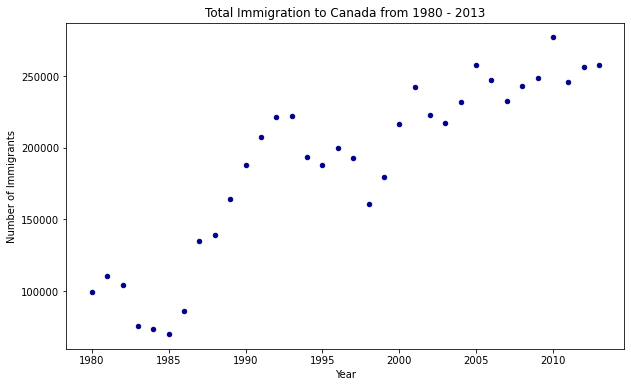

In [91]:
df_tot.plot(kind='scatter', x='years', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [92]:
x= df_tot['years']
y=df_tot['total']
fit= np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

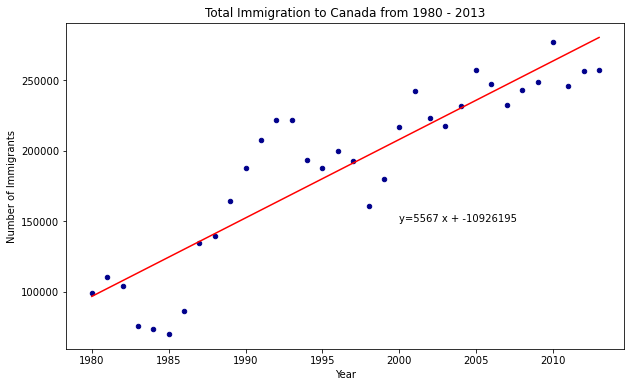

number of immigrants=5567 year + -10926195


In [93]:
df_tot.plot(kind='scatter', x='years', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.plot(x,fit[0]*x+fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()
print('number of immigrants={0:.0f} year + {1:.0f}'.format(fit[0], fit[1]))

 Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

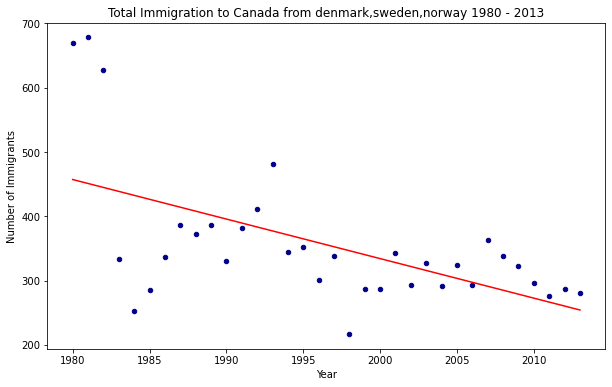

number of immigrants=-6 year + 12628


In [97]:
df_countries=df_can.loc[['Denmark','Sweden','Norway'],years].transpose()
df_total=pd.DataFrame(df_countries.sum(axis=1))

df_tot= pd.DataFrame(df_can[years].sum(axis=0))

df_total.reset_index(inplace=True)
df_total.columns=['years','total']
df_total['years']=df_total['years'].astype(int)

x= df_total['years']
y=df_total['total']
fit= np.polyfit(x,y,deg=1)
fit
df_total.plot(kind='scatter', x='years', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from denmark,sweden,norway 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.plot(x,fit[0]*x+fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()
print('number of immigrants={0:.0f} year + {1:.0f}'.format(fit[0], fit[1]))

### Bubble plots
bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013

In [98]:
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [99]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

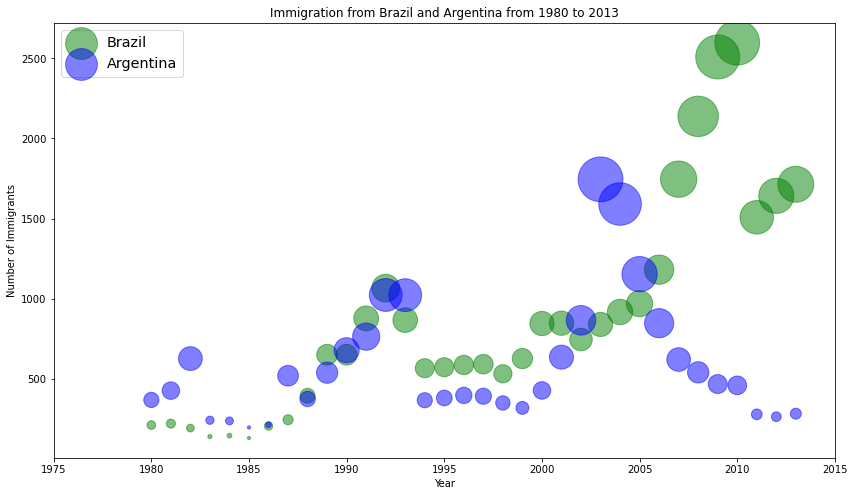

In [100]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

In [101]:
# normalize china data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_India = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

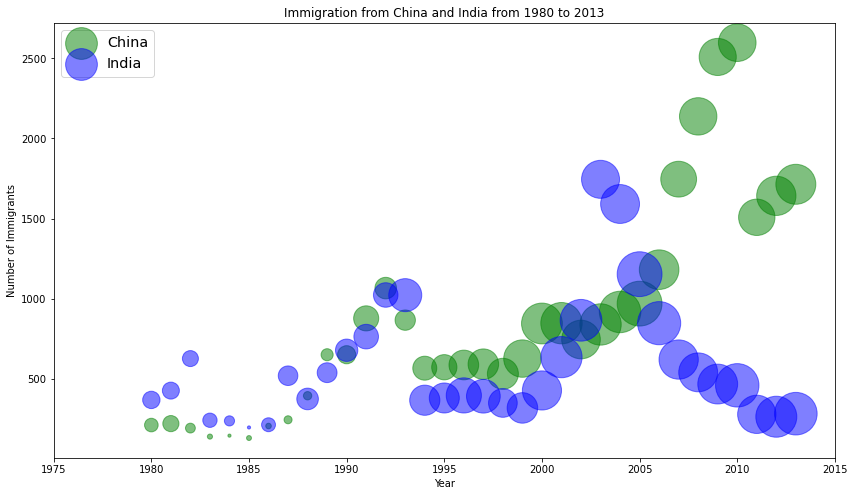

In [102]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_India * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

## Summary
Here we take Immigration to dataset and we converted into pandas. we clean and process data by dropping some columns by changing name of some columns, by adding column total and changing index of country.
we created pie charts for immigrants travelled by groupin into continents and in 2013 year.
we created box plots for immigrants of japan ,china and india. we alsi created sub plots and compare simultaneously box and line plots of china and india.
we created Scatter plots for total number of immigrants to years by creating Linear regression and also created scatter plots fot Denmark,swedem,norway.
we created Bubble plot for Brazil and argentina by adding years as weight normalise it and add as bubble.we also created bubble plot for China & India by adding Year as weight & normalise it .Here large bubble means more immigrants that year.

Author-Harsha Veena Kondeti